In [67]:
!pip install matplotlib deap

In [68]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [69]:
num_locations = 10
locations = [(random.uniform(0, 100), random.uniform(0, 100)) for _ in range(num_locations)]
depot =(random.randint(0,100),random.randint(0,100))
num_vehicles = 3

In [70]:
print("Number of location", num_locations)
print("Locations",locations)
print("Depot",depot)
print("Number of vehicles",num_vehicles)

Number of location 10
Locations [(42.74001593765851, 70.5708188137196), (83.82720073417678, 75.04429669504108), (59.49848847283019, 20.414168880393202), (31.076999366197423, 7.700847885532469), (10.95619639185439, 86.01275968967663), (3.7787994989739393, 60.46806844707354), (14.673073455095986, 59.973193040834595), (89.79560922452282, 71.3841972793098), (67.24861824522826, 43.04348325646799), (75.69798336704301, 63.76767164649675)]
Depot (5, 73)
Number of vehicles 3


In [71]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",  base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [72]:
#TASK 4 - Starting with the toolbox and tools

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initRepeat,creator.Individual,toolbox.indices,n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [73]:
# TASK 5 and 6

import math
from statistics import stdev
# Task 5: Fitness Evaluation Function
def evalVRP(individual):
    """Calculate total distance and standard deviation of distances for VRP."""
    def distance(p1, p2):
        return math.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    # Calculate distances
    distances = [distance(depot, locations[individual[0]])]  # From depot to first location
    distances += [distance(locations[individual[i]], locations[individual[i + 1]]) for i in range(len(individual) - 1)]
    distances.append(distance(locations[individual[-1]], depot))  # From last location to depot

    # Return total distance and standard deviation
    return sum(distances), stdev(distances)

# Task 6: Register the Evaluation Function
# Setup for DEAP
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))  # Minimize both total distance and standard deviation
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Example setup for locations and depot
num_locations = 10
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)  # Fixed depot location

# Register functions in the toolbox
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evalVRP)

# Test the setup
population = toolbox.population(n=5)  # Create a small population
for ind in population:
    ind.fitness.values = toolbox.evaluate(ind)  # Assign fitness
    print(f"Individual: {ind}")
    print(f"Fitness (Total Distance, Standard Deviation): {ind.fitness.values}")


Individual: [9, 1, 3, 4, 6, 7, 2, 0, 8, 5]
Fitness (Total Distance, Standard Deviation): (507.19754007917953, 26.723951690916646)
Individual: [3, 0, 2, 6, 1, 5, 4, 9, 7, 8]
Fitness (Total Distance, Standard Deviation): (438.15656885090016, 21.737445942806215)
Individual: [0, 6, 2, 1, 9, 7, 4, 5, 3, 8]
Fitness (Total Distance, Standard Deviation): (575.2692145415436, 16.003218653745712)
Individual: [6, 0, 4, 8, 2, 1, 5, 7, 3, 9]
Fitness (Total Distance, Standard Deviation): (607.827891898701, 27.40292848152301)
Individual: [1, 9, 3, 6, 0, 4, 5, 8, 2, 7]
Fitness (Total Distance, Standard Deviation): (630.4780736818047, 18.317750607856983)


In [74]:

#Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty


In [75]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

In [76]:
# SOLUTION - TASK 8
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

gen	nevals	avg    	min    
0  	300   	280.477	15.6285
1  	220   	266.817	15.3181
2  	240   	264.104	14.0939
3  	229   	252.948	15.5616
4  	228   	248.005	15.508 
5  	218   	244.552	15.5616
6  	220   	239.661	15.1018
7  	232   	229.951	14.6867
8  	223   	218.428	14.6438
9  	219   	213.38 	14.3366
10 	251   	208.957	13.8731
11 	221   	199.426	13.8886
12 	221   	187.904	13.5996
13 	212   	181.523	13.5996
14 	216   	177.167	14.3217
15 	222   	168.244	13.5996
16 	229   	163.034	14.3366
17 	230   	162.658	13.5996
18 	228   	160.716	15.1289
19 	244   	156.304	17.1963
20 	223   	156.354	13.9235
21 	222   	158.323	15.1289
22 	223   	158.594	16.9674
23 	218   	158.319	15.8369
24 	240   	157.32 	17.4829
25 	227   	158.317	16.986 
26 	235   	156.136	15.1289
27 	235   	158.099	15.1289
28 	235   	158.149	15.1289
29 	240   	158.211	15.1289
30 	235   	157.849	16.9674
31 	232   	157.395	17.7049
32 	229   	157.43 	16.6856
33 	243   	158.871	15.1289
34 	214   	157.854	15.5245
35 	234   	159.361	16.9674
3

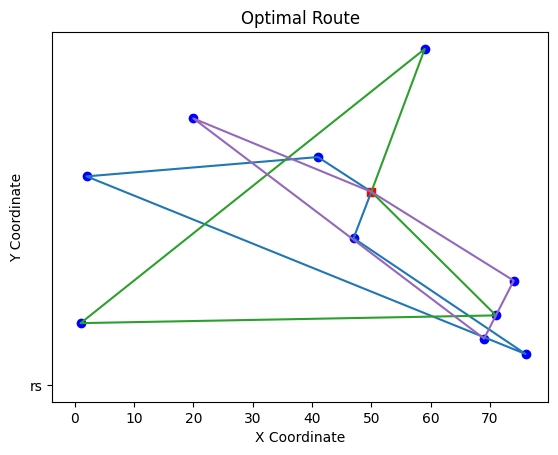

In [77]:
# Running the Genetic Algorithm
# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof
if __name__ == "__main__":
    # TODO: Task 9 - Call the main function, run the algorithm and print the results;
    main()
